Calculate flux dependence on zenith and/or atmosphere
-----------------------------------------------------

This notebook creates *Figure 5* from the proceedings. http://inspirehep.net/record/1346929 The result may be slightly different since MCEq evolved over time.

In [1]:
import crflux.models as pm
import matplotlib.pyplot as plt

from MCEq.core import MCEqRun

Initialize the `mceq_run` object
--------------------------------

In [2]:
mceq_run = MCEqRun(
interaction_model='SIBYLL2.3c',
primary_model=(pm.HillasGaisser2012, "H3a"),
theta_deg=0.
)

MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H3a


Define what to calculate
------------------------

This example will calculate the flux for 5 different atmospheric profiles and 2 zenith angles. Zenith of 0 means vertical and 90 horizontal respectively. Note that the more inclide the shower trajectory is, the more integration steps *(read: calculation time)* are necessary. The total (conventional + prompt) fluxes will be stored in the `*_dict` dictionaries for plotting in the next step.

In [3]:
mup_dict, numu_dict, nue_dict = {}, {}, {}
for atm_tup in [(('CORSIKA', ('PL_SouthPole', 'January')), 'red'),
                (('CORSIKA', ('PL_SouthPole', 'August')), 'lightblue'),
                (('MSIS00', ('SouthPole', 'January')), 'darkred'),
                (('MSIS00', ('SouthPole', 'August')), 'blue'),
                (('CORSIKA', ('BK_USStd', None)), 'black')]:


    mceq_run.set_density_model(atm_tup[0])
    for theta in [0., 90.]:
        
        mceq_run.set_theta_deg(theta)
        mceq_run.solve()

        mag = 3

        mup_dict[(theta, atm_tup)] = mceq_run.get_solution('total_mu+', mag) + \
                               mceq_run.get_solution('total_mu-', mag)

        numu_dict[(theta, atm_tup)] = mceq_run.get_solution('total_numu', mag) + \
                                mceq_run.get_solution('total_antinumu', mag)

        nue_dict[(theta, atm_tup)] = mceq_run.get_solution('total_nue', mag) + \
                               mceq_run.get_solution('total_antinue', mag)

MCEqRun::set_density_model(): Setting density profile to CORSIKA ('PL_SouthPole', 'January')
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('PL_SouthPole', 'August')
MCEqRun::set_density_model(): Setting density profile to MSIS00 ('SouthPole', 'January')
MCEqRun::set_density_model(): Setting density profile to MSIS00 ('SouthPole', 'August')
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)


Plot with `matplotlib`
----------------------

In [4]:
mup_dict.keys()

[(0.0, (('MSIS00', ('SouthPole', 'January')), 'darkred')),
 (90.0, (('MSIS00', ('SouthPole', 'January')), 'darkred')),
 (90.0, (('CORSIKA', ('PL_SouthPole', 'January')), 'red')),
 (90.0, (('CORSIKA', ('BK_USStd', None)), 'black')),
 (90.0, (('CORSIKA', ('PL_SouthPole', 'August')), 'lightblue')),
 (0.0, (('MSIS00', ('SouthPole', 'August')), 'blue')),
 (90.0, (('MSIS00', ('SouthPole', 'August')), 'blue')),
 (0.0, (('CORSIKA', ('BK_USStd', None)), 'black')),
 (0.0, (('CORSIKA', ('PL_SouthPole', 'August')), 'lightblue')),
 (0.0, (('CORSIKA', ('PL_SouthPole', 'January')), 'red'))]

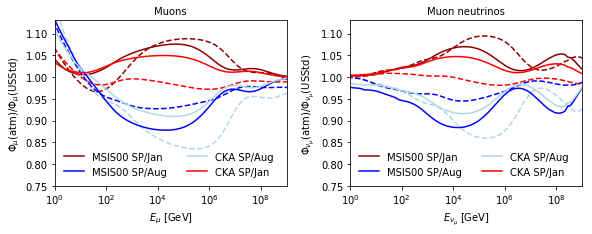

In [8]:
color_spectrum = ['b', 'r', 'g', 'orange', 'cyan', 'violet',
                  'brown', 'pink', 'yellow', 'lightblue']
titles = {('CORSIKA', ('PL_SouthPole', 'January')): 'CKA SP/Jan',
          ('CORSIKA', ('PL_SouthPole', 'August')): 'CKA SP/Aug',
          ('MSIS00', ('SouthPole', 'January')): 'MSIS00 SP/Jan',
          ('MSIS00', ('SouthPole', 'August')): 'MSIS00 SP/Aug',
          ('CORSIKA', ('BK_USStd', None)):'USStd'}

fig = plt.figure(figsize=(8.5, 3.5))
fig.set_tight_layout(dict(rect=[0.01, 0.01, 0.99, 0.97]))
e_grid = mceq_run.e_grid

# Define base line
compare_to = (('CORSIKA', ('BK_USStd', None)), 'black')

for theta, atm_tup in mup_dict:
    atm_config, atm_col = atm_tup

    if atm_config[1][0].startswith('BK'):
        continue
    
    mup_comp = mup_dict[(theta, compare_to)]
    numu_comp = numu_dict[(theta, compare_to)]
    nue_comp = nue_dict[(theta, compare_to)]
    
    ls = '--'
    atm_title = '_nolabel_'
    if theta < 90.:
        ls='-'
        atm_title = titles[atm_config]

     
    plt.subplot(121)        
    plt.plot(e_grid, mup_dict[(theta, atm_tup)] / mup_comp, ls=ls, lw=1.5,
             color=atm_col, label=atm_title)
    plt.semilogx()
    plt.xlabel(r"$E_{\mu}$ [GeV]")
    plt.ylim([0.75, 1.1])

    plt.subplot(122)
    plt.plot(e_grid, numu_dict[(theta, atm_tup)] / numu_comp, ls=ls,  lw=1.5,
             color=atm_col, label=atm_title)
    plt.semilogx()
    plt.xlabel(r"$E_{\nu}$ [GeV]")


plt.subplot(121)
plt.title('Muons', fontsize=10)
plt.xlabel(r"$E_{\mu}$ [GeV]")
plt.ylabel(r"$\Phi_{\mu}($atm$)/\Phi_{\mu}($USStd)")
plt.xlim([1,1e9])
plt.ylim([0.75, 1.13])
plt.legend(loc='lower left', ncol=2, frameon=False, fontsize=10)

plt.subplot(122)
plt.title('Muon neutrinos', fontsize=10)
plt.xlabel(r"$E_{\nu_\mu}$ [GeV]")
plt.ylabel(r"$\Phi_{\nu_\mu}($atm$)/\Phi_{\nu_\mu}($USStd)")
plt.xlim([1,1e9])
plt.ylim([0.75, 1.13])
plt.legend(loc='lower left', ncol=2, frameon=False, fontsize=10)
# plt.savefig('atm_flux.pdf')